[]


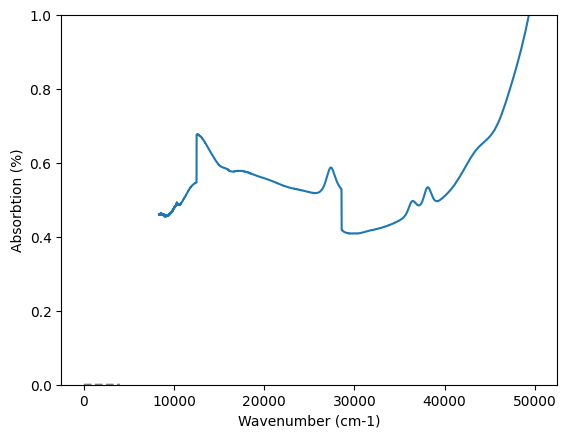

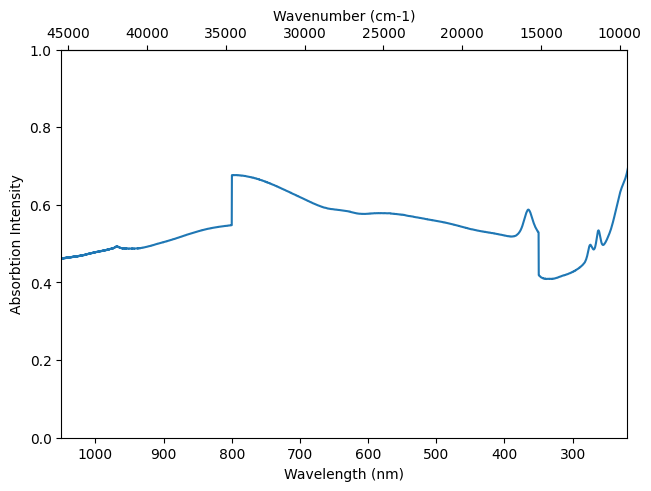

Text(0.5, 1.0, 'CaF2:Yb Absorbtion Spectra (%T vs Wave number)')

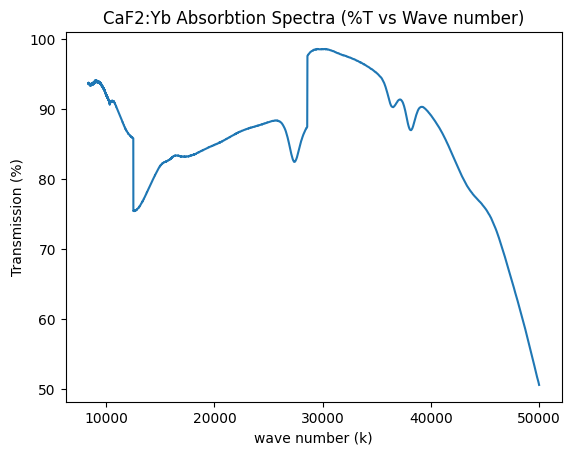

In [65]:
import matplotlib.pyplot as plt
import numpy as np

def nm2wn(nm):
    return (10**7)/nm


def wn2nm(wn):
    return wn/(10**7)

#Loads the data
#data = np.genfromtxt('381Ybscan1.csv', skip_header=2)
data = np.loadtxt('381YBscan1.csv', skiprows=2, delimiter=',', usecols=(0,1), max_rows=4001)
#data = np.genfromtxt('381 Yb scan2.csv', skip_header=1)

wavelength = data[:,0]
transmission = data[:,1]
absorbtion = []
for trans in transmission:
    absorbtion.append(5-np.log(trans))
    
absorbtion = np.array(absorbtion)
wavelength = np.array(wavelength)

plt.plot((10**7)/wavelength, 5-np.log(transmission))
plt.xlabel("Wavenumber (cm-1)")
plt.ylabel("Absorbtion (%)")
plt.ylim(0,1)

from scipy.signal import find_peaks
peaks, _ = find_peaks(wavelength, height=0, prominence=4,  distance=2, width=2, threshold=0.1, rel_height=0.5)
plt.plot(peaks, wavelength[peaks], "x")
plt.plot(np.zeros_like(wavelength), "--", color="gray")
print( [(i,j) for i, j in zip(peaks, wavelength[peaks] )] )

fig, ax = plt.subplots(constrained_layout=True)
ax.plot(wavelength,absorbtion)
#ax.set_title('Emission spectra of CaF2:Yb when excited \n with 365nm UV light at various temperatures')
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Absorbtion Intensity")
ax.set_xlim(1050,220)
ax.set_ylim(0,1)
        
secax = ax.secondary_xaxis('top', functions=(nm2wn, wn2nm))
secax.set_xlabel('Wavenumber (cm-1)')
secax.set_xlim(10000,45000)
plt.savefig('absorbtion spectra.PNG')
plt.show()

plt.figure()
plt.plot((10**7)/wavelength, transmission)
plt.xlabel("wave number (k)")
plt.ylabel("Transmission (%)")
plt.title("CaF2:Yb Absorbtion Spectra (%T vs Wave number)")

[]


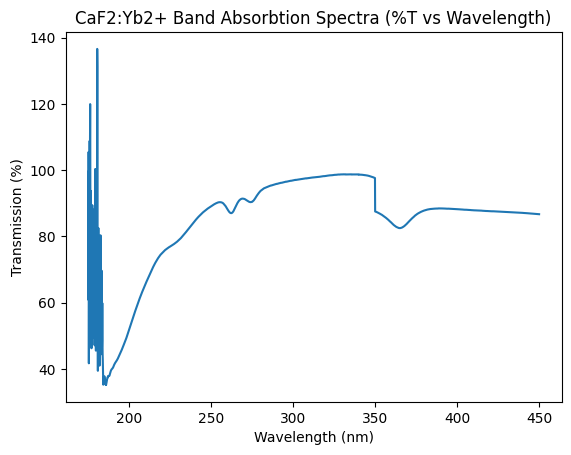

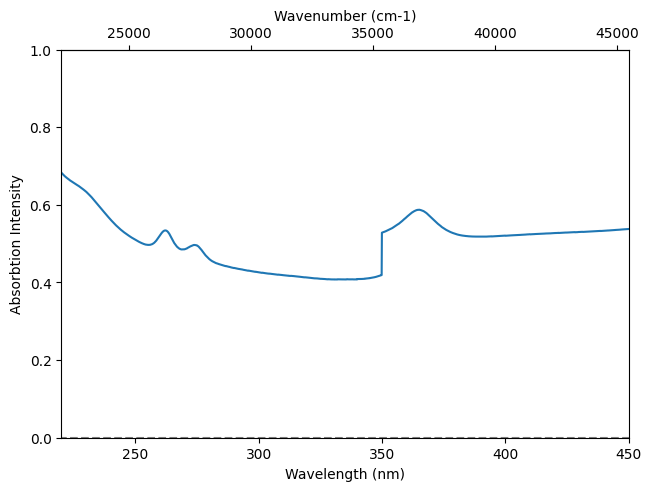

Text(0.5, 1.0, 'CaF2:Yb2+ Band Absorbtion Spectra (%T vs Wave number)')

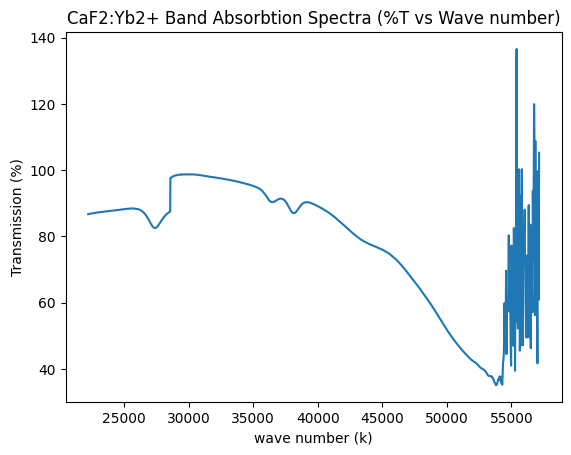

In [58]:
import matplotlib.pyplot as plt
import numpy as np

#Loads the data
#data = np.genfromtxt('381Ybscan1.csv', skip_header=2)
data2 = np.loadtxt('381 YB scan2.csv', skiprows=2, delimiter=',', usecols=(0,1), max_rows=2751)

wavelength2 = data2[:,0]
transmission2 = data2[:,1]
absorbtion2 = []
for trans in transmission2:
    absorbtion2.append(5-np.log(trans))

plt.plot(wavelength2, transmission2)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Transmission (%)")
plt.title("CaF2:Yb2+ Band Absorbtion Spectra (%T vs Wavelength)")

fig, ax = plt.subplots(constrained_layout=True)
ax.plot(wavelength2,absorbtion2)
#ax.set_title('Emission spectra of CaF2:Yb when excited \n with 365nm UV light at various temperatures')
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Absorbtion Intensity")
ax.set_xlim(220, 450)
ax.set_ylim(0,1)

from scipy.signal import find_peaks
peaks, _ = find_peaks(wavelength)
plt.plot(peaks, wavelength[peaks], "x")
plt.plot(np.zeros_like(wavelength), "--", color="gray")
print( [(i,j) for i, j in zip(peaks, wavelength[peaks] )] )
        
secax = ax.secondary_xaxis('top', functions=(nm2wn, wn2nm))
secax.set_xlabel('Wavenumber (cm-1)')
plt.savefig('absorbtion spectra vs wavelength Yb2+.PNG')
plt.show()

plt.figure()
plt.plot((10**7)/wavelength2, transmission2)
plt.xlabel("wave number (k)")
plt.ylabel("Transmission (%)")
plt.title("CaF2:Yb2+ Band Absorbtion Spectra (%T vs Wave number)")

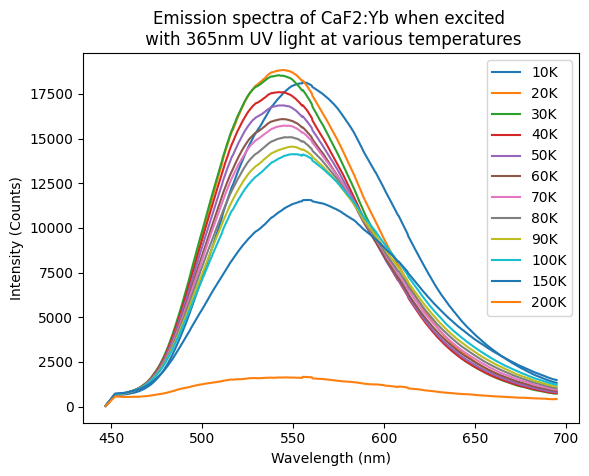

<Figure size 640x480 with 0 Axes>

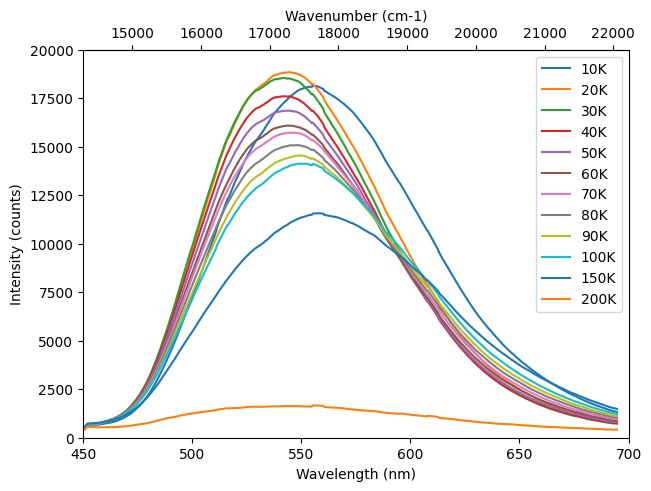

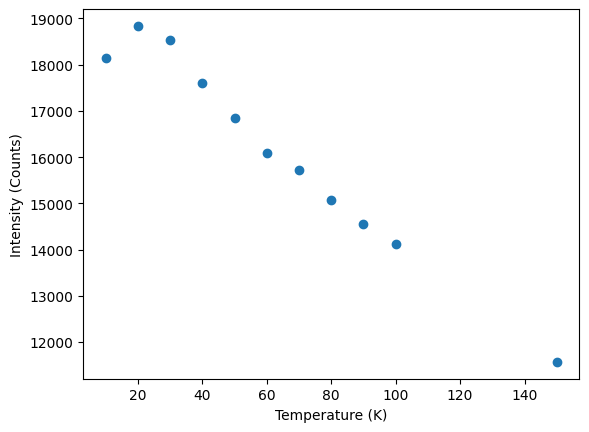

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import glob

def nm2wn(nm):
    return (10**7)/nm


def wn2nm(wn):
    return wn/(10**7)

def read_folder(foldername, temperatures):
    #Reads data from all folders
    files = glob.glob(foldername+'**', 
                   recursive = False)
    i = 0
    for file in files:
        data = np.loadtxt(file, skiprows=300, usecols=(0,1), max_rows=700)
        wavelength = data[:,0]
        intensity = data[:,1]
        n = 15  # the larger n is, the smoother curve will be
        b = [1.0 / n] * n
        a = 1
        yy = lfilter(b, a, intensity)
        wavelengths.append(wavelength)
        intensities.append(yy)
        plt.plot(wavelength,yy, label="{}K".format(temperatures[i]))
        peak_intensities.append(max(yy))
        i = i+1
        

wavelengths = [] 
intensities = []
peak_intensities = []
foldername = 'L&J/' 
temperatures = [10,20,30,40,50,60,70,80,90,100,150,200]
read_folder(foldername, temperatures)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Counts)')
plt.legend(loc='upper right')
plt.title('Emission spectra of CaF2:Yb when excited \n with 365nm UV light at various temperatures')
plt.savefig('Intensity vs wavelength at various temperatures.PNG')
plt.figure()

fig, ax = plt.subplots(constrained_layout=True)
for i in range(0, len(wavelengths)):
    ax.plot(wavelengths[i],intensities[i], label="{}K".format(temperatures[i]))
#ax.set_title('Emission spectra of CaF2:Yb when excited \n with 365nm UV light at various temperatures')
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Intensity (counts)")
ax.legend(loc='upper right')
ax.set_xlim(450,700)
ax.set_ylim(0,20000)
        
secax = ax.secondary_xaxis('top', functions=(nm2wn, wn2nm))
secax.set_xlabel('Wavenumber (cm-1)')
plt.savefig('Emission spectra at various temperatures.PNG')
plt.show()

plt.scatter(temperatures[0:11], peak_intensities[0:11])
plt.xlabel('Temperature (K)')
plt.ylabel('Intensity (Counts)')
plt.savefig('Intensity vs Temperatures.PNG')



In [ ]:
def int_func(E, T):
    k_b = 1.38*10**(-23)
    print(1/(1+np.exp(E/(k_b*T))))
    return 1/(1+np.exp(E/(k_b*T)))

energy = 0.5*1.6*10**(-19)
temps = [1,10,30,50,100,200]
for temp in temps:
    print(temp)
    plt.scatter(int(temp), int_func(energy,int(temp)), label="{}K".format(temp))
plt.xlabel('Temperature (K)')
plt.ylabel('Intensity (Counts)')
plt.yscale('log')
plt.legend(loc='lower right')
plt.title('Intensity fermi-dirac approximation at various temperatures')
#plt.savefig('Intensity vs wavelength at various temperatures.PNG')
plt.figure()

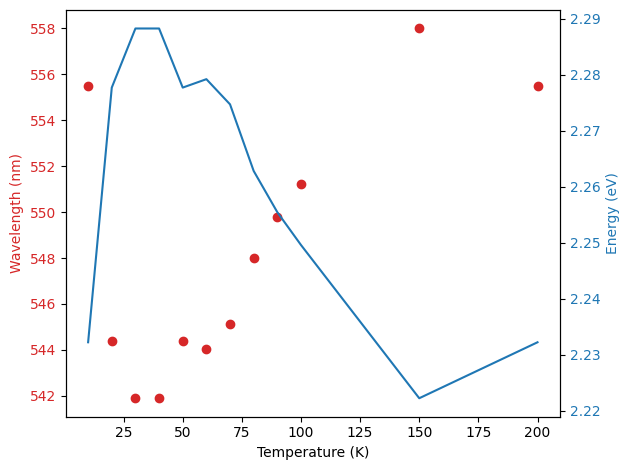

In [25]:
import matplotlib.pyplot as plt
from scipy.signal import lfilter
import numpy as np
import glob

def nm2wn(nm):
    return (10**7)/nm


def wn2nm(wn):
    return wn/(10**7)

def read_folder(foldername, temperatures):
    #Reads data from all folders
    files = glob.glob(foldername+'**', 
                   recursive = False)
    i = 0
    for file in files:
        data = np.loadtxt(file, skiprows=300, usecols=(0,1), max_rows=700)
        wavelength = data[:,0]
        intensity = data[:,1]

        n = 15  # the larger n is, the smoother curve will be
        b = [1.0 / n] * n
        a = 1
        yy = lfilter(b, a, intensity)
        wavelengths.append(wavelength)
        intensities.append(yy)
        peak_intensities.append(max(intensity))
        peak_wavelengths.append(wavelength[yy.argmax()])
        i = i+1
        

wavelengths = [] 
intensities = []
peak_intensities = []
peak_wavelengths = []
peak_energies = []
colors = []

foldername = 'L&J/' 
temperatures = [10,20,30,40,50,60,70,80,90,100,150,200]
read_folder(foldername, temperatures)

for wavelength in peak_wavelengths:
    peak_energies.append(1240/wavelength)

#plt.scatter(temperatures, peak_wavelengths)
#plt.xlabel('Temperature (K)')
#plt.ylabel('Wavelength (nm)')
#plt.savefig('Wavelength vs Temperatures.PNG')

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Temperature (K)')
ax1.set_ylabel('Wavelength (nm)', color=color)
ax1.scatter(temperatures, peak_wavelengths, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Energy (eV)', color=color)  # we already handled the x-label with ax1
ax2.plot(temperatures, peak_energies, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Wavelength&energy vs Temperatures.PNG')
plt.show()


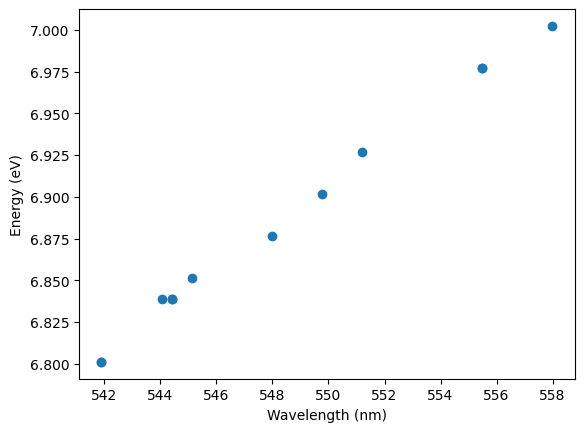

In [26]:
E = []

h = 1.055*10**(-34)
S = 1
energy = 10**(-13)


for wavelength in peak_wavelengths:
    omega_peak = 2*np.pi*((3*10**8)/int(wavelength))
    E.append(((energy - S*h*omega_peak)**2)/(4*S*h*omega_peak))
    
plt.scatter(peak_wavelengths, E)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Energy (eV)')
plt.savefig('Wavelength vs Temperatures.PNG')